In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df7 = pd.read_csv("/content/drive/MyDrive/Google Collab/bank.csv")
df7 = df7.replace('married',1)
df7 = df7.replace('single',0)
df7 = df7.replace('divorced',11)
df7 = df7.replace('admin.',1)
df7 = df7.replace('technician',2)
df7 = df7.replace('services',3)
df7 = df7.replace('management',4)
df7 = df7.replace('retired',5)
df7 = df7.replace('blue-collar',6)
df7 = df7.replace('unemployed',7)
df7 = df7.replace('entrepreneur',8)
df7 = df7.replace('housemaid',9)
df7 = df7.replace('student',10)
df7 = df7.replace('self-employed',11)
df7 = df7.replace('primary',1)
df7 = df7.replace('secondary',2)
df7 = df7.replace('tertiary',3)
df7 = df7.replace('unknown',0)
df7 = df7.replace('yes',1)
df7 = df7.replace('no',0)
df7 = df7.replace('cellular',1)
df7 = df7.replace('telephone',2)
df7 = df7.replace('jan',1)
df7 = df7.replace('feb',2)
df7 = df7.replace('mar',3)
df7 = df7.replace('apr',4)
df7 = df7.replace('may',5)
df7 = df7.replace('jun',6)
df7 = df7.replace('jul',7)
df7 = df7.replace('aug',8)
df7 = df7.replace('sep',9)
df7 = df7.replace('oct',10)
df7 = df7.replace('nov',11)
df7 = df7.replace('dec',12)


df7

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,1,1,2,0,2343,1,0,0,5,5,1042,1,-1,0,0,1
1,56,1,1,2,0,45,0,0,0,5,5,1467,1,-1,0,0,1
2,41,2,1,2,0,1270,1,0,0,5,5,1389,1,-1,0,0,1
3,55,3,1,2,0,2476,1,0,0,5,5,579,1,-1,0,0,1
4,54,1,1,3,0,184,0,0,0,5,5,673,2,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,6,0,1,0,1,1,0,1,20,4,257,1,-1,0,0,0
11158,39,3,1,2,0,733,0,0,0,16,6,83,4,-1,0,0,0
11159,32,2,0,2,0,29,0,0,1,19,8,156,2,-1,0,0,0
11160,43,2,1,2,0,0,0,1,1,8,5,9,2,172,5,failure,0


In [11]:
feature_cols = ['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','pdays']
x = df7[feature_cols]#Features
y = df7['deposit']#Target variable
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,pdays
0,59,1,1,2,0,2343,1,0,0,5,5,1042,-1
1,56,1,1,2,0,45,0,0,0,5,5,1467,-1
2,41,2,1,2,0,1270,1,0,0,5,5,1389,-1
3,55,3,1,2,0,2476,1,0,0,5,5,579,-1
4,54,1,1,3,0,184,0,0,0,5,5,673,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,6,0,1,0,1,1,0,1,20,4,257,-1
11158,39,3,1,2,0,733,0,0,0,16,6,83,-1
11159,32,2,0,2,0,29,0,0,1,19,8,156,-1
11160,43,2,1,2,0,0,0,1,1,8,5,9,172


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=0)


In [13]:
# Instantiate The Model(using default parameters)
logreg = LogisticRegression()

#Fit the model with data
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.metrics import confusion_matrix
cm =  confusion_matrix(y_test,y_pred)
print(cm)

[[1446  346]
 [ 421 1136]]


Text(0.5, 427.9555555555555, 'Prdeicted label')

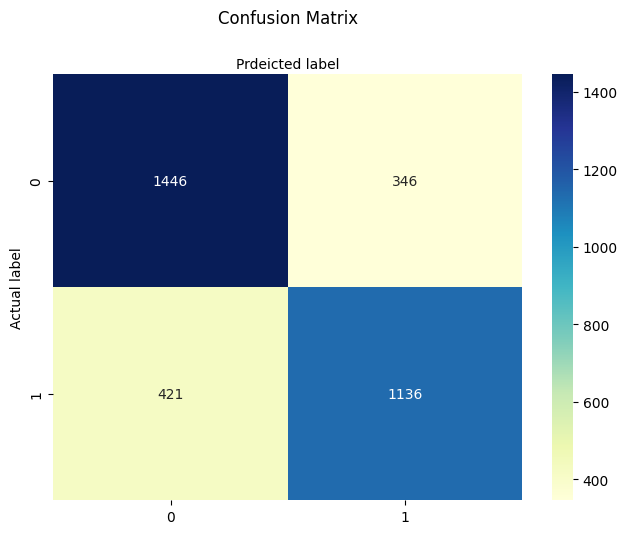

In [15]:
class_names = [1,0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#create heatmap
sb.heatmap(pd.DataFrame(cm), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Prdeicted label')

In [16]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1792
           1       0.77      0.73      0.75      1557

    accuracy                           0.77      3349
   macro avg       0.77      0.77      0.77      3349
weighted avg       0.77      0.77      0.77      3349

